# Training Models
We explore the actual math behind the model's we've been using.  

Goals:
* Regression
* Gradient Descent
* Polynomial Gradients
* Learning Curves
* Regularized Linear Models
* Logistic Regression

## Regression
The simplest model is regression.  We have a set of data, we build a model of it, and then use that model to interpolate or extrapolate on new data. 

There are many ways to arrive at the parameters defining a model, the simplest data sets allow the simplest method: directly computing the model parameters.

We can think of simply finding the slope and intersection of a set of point values.  These are given by well known equations. However, not all situations allow for this.

A general method, gradient descent, can be used 'online' to gradually train data one element at a time.  Slowly, the parameters found by GD will converge to those found by the (only available in simple cases) closed form solution.

### Linear Regression
The simplest type with a closed form solution.

$ \hat{y} = h_\theta(\textbf{x}) = \theta^T\cdot\textbf{x}$

$\theta$ is the vector of parameters, a weight for each input variable, and one addition bias term.

Training the function $h_\theta$ is a matter of selecting the values for these parameters that minimizes some measure of error.  In this example, we will train the function by minimizing the Mean Square Error of the data points.  Luckily for us, finding these values boils down to a 'simple' equation in linear algebra, the **Normal Equation**:

$\hat{\theta} = (\textbf{X}^T \cdot \textbf{X})^{-1}\cdot \textbf{X}^T\cdot{y}$

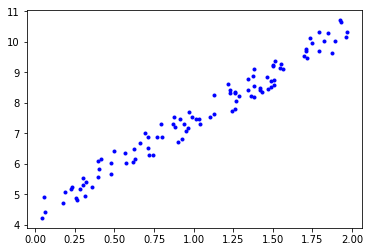

In [1]:
# An Example in 2-D, that is, the parameter vector is size 2, one for the single variable x, and one for a bias.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

plt.plot(X,y,".b")
plt.show()

Parameters from Normal Function:
 [[ 4.41599494]
 [ 3.04409457]]


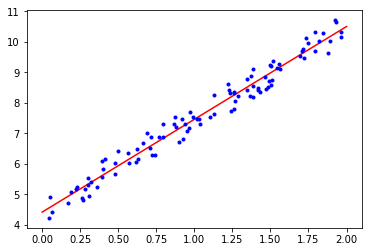

In [7]:
# Now lets find a theta vector using the normal equation.
X_b = np.c_[np.ones((100,1)), X] # To have the bias term, we need to add a field/col to the row 

# Here we actually apply the **Normal Function**
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print('Parameters from Normal Function:\n', theta_best)

# We can use the new thetas to build a predicted set of points:
X_new   = np.array([[0],[2]])  # Again, padding to add the 0th parameter
X_new_b = np.c_[np.ones((2,1)), X_new]

y_predict = X_new_b.dot(theta_best) # Yay linear algebra! - Here we apply the new thetas to the two points in the
                                    # new X domain (0 and 2), which we can use to plot a line.

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

### SKLearn
SKLearn comes wiht ready to use linear regression models that handle all of this for us.  To use them we do:

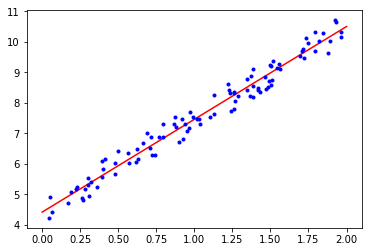

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_predict = lin_reg.predict(X_new) # Outputs a parameter vector

plt.plot(X_new, lin_predict, "r-")   # Plot the parameter vector as a line against the input
plt.plot(X, y, "b.")
plt.show()

It should be noted that the normal equation is $O(n^3)$ where $n$ is the number of features in the parameter vector.  For very large numbers of features there are more efficient methods.

## Gradient Descent
This is a generic tool for finding the parameters of a model.  In it, one follows the gradient of error 'downhill' to an optimal solution.  The values for the parameter vector start at some random set.  Incrementally, the training instances are used to update the parameters, in a 'direction' that minimizes the error function.  

An important hyperparameter is the size of the steps that are taken every time an instance is used to update the parameters.  This is the **Learning Rate**.  Too high of a learning rate will prevent the descent from settling on a value, instead oscilllating between far away extremes.  Too small of a learning rate will prevent the desscent from reaching any minimum, causing it to get stuck on plateus or in non-optimal solutions.

In addition, it is never gaureenteed that gradient descent will find a true global optimum.  The actual curves possible parameter vectors can take wrt their error functions can be non-monotonic, have holes, have sharp edges.  All of these features could create situations that prevent a GD algorithm from settling on a true optimum, instead getting stuck on some pathological part of the parameter/error graph.

The best case scenario is using GD on a convex function.  Luckily, the graph of the Mean Squared Error is convex.  So we have some surety that GD will settle on optimal values for a linear regression model.

**Side Note** - using GD requires that all features have a similar scale.  That is, the domains and ranges of the variables are on similar scales.  This can be accomplished by using many of the SKLearn toolkit methods.  

### Batch Gradient Descent
Actually implementing GD requires us calculating just how much the cost function changes when we change each parameter, $\theta_i$.  In other words, we need to find the partial derivative of the cost function.  In this case, this means taking the partial derivative of the mean square error function with respect to each of the parameters.

$\frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^m(\theta^T\cdot\textbf{x}^{(i)}-y^{(i)})x^{(i)}_j$

We can do this in one go by creating a vector of these partial derivatives, the gradient vector.

$\nabla_{\theta}MSE(\theta) = \frac{2}{m}\textbf{X}^T\cdot(\textbf{X}\cdot\theta-y)$

Once we have the gradient vector for our cost function, stepping through the descent is just applying the following formula.  To get the next parameter vector, subtract a small portion from the old one, proportional to the old ones mean square error.  The proportionality constant is the learning rate.  

$\theta^{new} = \theta^{old} - \eta\nabla_{\theta}MSE(\theta^{old})$

In [8]:
# An example
eta = 0.1 # Learning Rate
n_iterations = 1000
m = 100 # number of data points

theta = np.random.randn(2,1) # Our random initial parameter vector

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # Applying the gradient vector to the 'old' theta
    theta = theta - eta*gradients # Setpping to the next iteration in the descent
    
print('Original Theta from Normal Function: \n', theta_best, '\nTheta from GD:\n', theta)

Original Theta from Normal Function: 
 [[ 4.41599494]
 [ 3.04409457]] 
Theta from GD:
 [[ 4.41599494]
 [ 3.04409457]]


Wow!  Exactly the same, in our amount of available precision!  Pretty awesome. 